<a href="https://colab.research.google.com/github/wendywtchang/NLP-projects/blob/master/emotion_analysis/Sentiment_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classifier
- Dataset: [A Multimodal Multi-Party Dataset for Emotion Recognition in Conversation (MELD)](https://github.com/declare-lab/MELD)
- Friends TV series
- Seven emotions: <br>
Anger, Disgust, Fear, Joy, Sadness, Surprise, Neutral <br>
= Elman emotions + Neutral
- train / dev / test: 9989 / 1109 / 2610
- Model: LSTM
- Library: Tensorflow / Keras

# Result
- Evaluation metric: F1-measure
- Training Epoch: 30
- The validation loss decrease until 5 epoch (val\_loss = 1.3743, F1 = 24.4%), while the best F1 achieve 26% at 28th epoch.
- 100 epoch do not fix the suffering f1 problem and validation loss keep increasing.

# Furture TODO
- fix visualization
- add callback
- optimization, use pretrained model, BiLSTM etc.

## 1. Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Sentiment/MELD/data/MELD
%ll

/content/drive/MyDrive/Sentiment/MELD/data/MELD
total 5330
-rw------- 1 root 3921408 Feb  9 21:41 datasets.yaml
-rw------- 1 root  121640 Feb  9 21:41 dev_sent_emo.csv
-rw------- 1 root  294526 Feb  9 21:41 test_sent_emo.csv
-rw------- 1 root 1119290 Feb  9 21:41 train_sent_emo.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
df_train = pd.read_csv('train_sent_emo.csv')
df_dev = pd.read_csv('dev_sent_emo.csv')
df_test = pd.read_csv('test_sent_emo.csv')

In [5]:
print(len(df_train), len(df_dev), len(df_test))

9989 1109 2610


In [6]:
df_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


### 1.1 create train / dev / test sentences and labels

In [7]:
# create train, dev, test sentences
train_sentences = df_train['Utterance'].tolist()
dev_sentences = df_dev['Utterance'].tolist()
test_sentences = df_test['Utterance'].tolist()

# create train, dev, test raw labels
train_labels_raw = df_train['Emotion'].tolist()
dev_labels_raw = df_dev['Emotion'].tolist()
test_labels_raw = df_test['Emotion'].tolist()

In [8]:
# create 7 emotions dictrionary
emo_dict = {}

for emo in enumerate(set(train_labels_raw)):
  # print(emo)
  emo_dict[emo[1]] = emo[0]

emo_dict

{'anger': 4,
 'disgust': 3,
 'fear': 6,
 'joy': 5,
 'neutral': 1,
 'sadness': 0,
 'surprise': 2}

In [9]:
# Helper function for cleaning labels
def clean_labels(labels_raw, df):
  labels = []
  label = np.zeros((7,), dtype=int)
  # print(labels_raw[:3])
  for tag in labels_raw:
    try:
      label[emo_dict[tag]] = 1
      labels.append(label)
      label = np.zeros((7,), dtype=int)
    except:
      # print(tag)
      pass
  assert len(labels) == len(df)
  return labels

In [10]:
# train
labels_raw = train_labels_raw
df =  df_train
train_labels = clean_labels(labels_raw, df)
train_labels[:10]

[array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0])]

In [11]:
# dev
labels_raw = dev_labels_raw
df =  df_dev
dev_labels = clean_labels(labels_raw, df)
dev_labels[:10]

[array([1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0])]

In [12]:
# test
labels_raw = test_labels_raw
df =  df_test
test_labels = clean_labels(labels_raw, df)
test_labels[:10]

[array([0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 0])]

In [13]:
# Make labels into numpy arrays for use with the network later
train_labels_final = np.array(train_labels)
dev_labels_final = np.array(dev_labels)
test_labels_final = np.array(test_labels)

In [14]:
train_labels_final[0]

array([0, 1, 0, 0, 0, 0, 0])

### 1.2 Tokenization

In [15]:
# Calculate max sentence length
max_length = 0
for sent in train_sentences:
  if len(sent.split()) > max_length:
    max_length = len(sent.split())
max_length

69

In [16]:
vocab_size = 1000
embedding_dim = 16
max_length = 80
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# train
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

# dev
dev_sequences = tokenizer.texts_to_sequences(dev_sentences)
dev_padded = pad_sequences(dev_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

# test
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [17]:
# review a sequence
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[0]))
print(train_sentences[0])

also i was the point person on my <OOV> <OOV> from the <OOV> <OOV> to <OOV> 6 system ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
also I was the point person on my company’s transition from the KL-5 to GR-6 system.


## Create LSTM Model

In [20]:
# Load tensorflow_addons for F1 score
!pip install tensorflow_addons

In [21]:
# import tensorflow + related functions
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow_addons as tfa

In [22]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics=['accuracy', tfa.metrics.F1Score(num_classes=7)])
# not SparseCategoricalCrossentropy
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 7)                 119       
                                                                 
Total params: 20,871
Trainable params: 20,871
Non-trainable params: 0
_________________________________________________________________


## Train

In [24]:
num_epochs = 30
history =model.fit(padded, train_labels_final, epochs=num_epochs, validation_data=(test_padded, test_labels_final))

Epoch 1/30
313/313 [==============================] - 10s 19ms/step - loss: 1.5882 - accuracy: 0.4686 - f1_score: 0.0928 - val_loss: 1.5027 - val_accuracy: 0.4812 - val_f1_score: 0.0928
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 1.4504 - accuracy: 0.4918 - f1_score: 0.1416 - val_loss: 1.4193 - val_accuracy: 0.5004 - val_f1_score: 0.1506
Epoch 3/30
313/313 [==============================] - 5s 17ms/step - loss: 1.3602 - accuracy: 0.5189 - f1_score: 0.2002 - val_loss: 1.3944 - val_accuracy: 0.5119 - val_f1_score: 0.1988
Epoch 4/30
313/313 [==============================] - 5s 16ms/step - loss: 1.3049 - accuracy: 0.5413 - f1_score: 0.2397 - val_loss: 1.3805 - val_accuracy: 0.5065 - val_f1_score: 0.2122
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 1.2701 - accuracy: 0.5506 - f1_score: 0.2651 - val_loss: 1.3743 - val_accuracy: 0.5146 - val_f1_score: 0.2440
Epoch 6/30
313/313 [==============================] - 3s 10ms/step - loss:

## Visualization

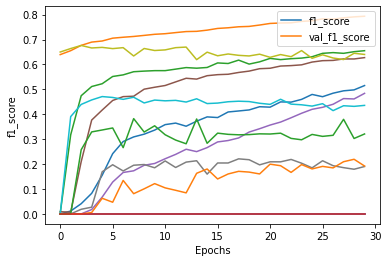

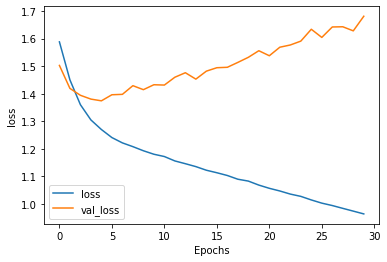

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "f1_score")
plot_graphs(history, "loss")